In [1]:
# %cd /content/drive/My Drive/Colab Notebooks/oureclecticmind/data/
# !wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
# !unzip -q cell_images.zip -d new

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


Using TensorFlow backend.


In [8]:
dataset = "/Users/jeffreyscruggs/Desktop/A.I. Projects/cell_images/"
Parasitized = dataset+"Parasitized/"
Uninfected = dataset+"Uninfected/"

In [9]:
print(os.listdir(dataset))

['.DS_Store', 'Parasitized', 'Malaria.py', 'malaria_CNN_classifier.txt', 'malaria.ipynb', 'Uninfected', 'Malaria2.0.py', 'Malaria Classifier.ipynb', 'Malaria_CNN_Notebook.ipynb', 'malaria_CNN_classifier.py', '.ipynb_checkpoints']


In [10]:
parasitized_data = os.listdir(Parasitized)
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir(Uninfected)
print('\n')
print(uninfected_data[:10])

['C118P79ThinF_IMG_20151002_105018_cell_150.png', 'C189P150ThinF_IMG_20151203_142224_cell_84.png', 'C91P52ThinF_IMG_20150821_123116_cell_189.png', 'C84P45ThinF_IMG_20150818_101226_cell_98.png', 'C144P105ThinF_IMG_20151015_163432_cell_310.png', 'C136P97ThinF_IMG_20151005_141803_cell_131.png', 'C65P26N_ThinF_IMG_20150818_154050_cell_177.png', 'C60P21thinF_IMG_20150804_105034_cell_105.png', 'C109P70ThinF_IMG_20150930_103811_cell_159.png', 'C176P137NThinF_IMG_20151201_122708_cell_126.png']


['C13NThinF_IMG_20150614_131318_cell_179.png', 'C205ThinF_IMG_20151106_152003_cell_21.png', 'C230ThinF_IMG_20151112_150647_cell_1.png', 'C134P95ThinF_IMG_20151005_121834_cell_65.png', 'C141P102ThinF_IMG_20151005_214836_cell_132.png', 'C167P128ReThinF_IMG_20151201_105559_cell_61.png', 'C218ThinF_IMG_20151106_144337_cell_57.png', 'C182P143NThinF_IMG_20151201_171950_cell_93.png', 'C181P142ThinF_IMG_20151127_160616_cell_54.png', 'C142P103ThinF_IMG_20151005_223257_cell_18.png']


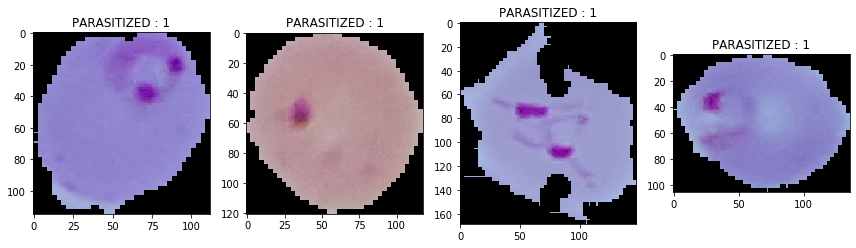

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(Parasitized + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

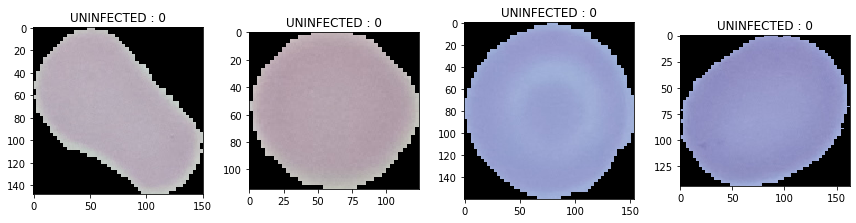

In [12]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(Uninfected + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

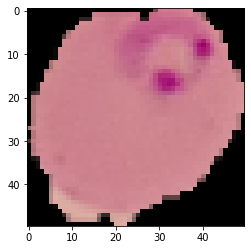

In [13]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread(Parasitized + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(Uninfected + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

plt.imshow(data[0])
plt.show()

In [14]:
image_data = np.array(data)
labels = np.array(labels)

In [15]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [17]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [18]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [19]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [20]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [21]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)       

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [23]:
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
22046/22046 [==============================] - 66s 3ms/step - loss: 0.6014 - accuracy: 0.7348
Epoch 2/20
22046/22046 [==============================] - 74s 3ms/step - loss: 0.2383 - accuracy: 0.9112
Epoch 3/20
22046/22046 [==============================] - 68s 3ms/step - loss: 0.1923 - accuracy: 0.9314
Epoch 4/20
22046/22046 [==============================] - 62s 3ms/step - loss: 0.1765 - accuracy: 0.9387
Epoch 5/20
22046/22046 [==============================] - 64s 3ms/step - loss: 0.1659 - accuracy: 0.9427
Epoch 6/20
22046/22046 [==============================] - 62s 3ms/step - loss: 0.1593 - accuracy: 0.9462
Epoch 7/20
22046/22046 [==============================] - 64s 3ms/step - loss: 0.1577 - accuracy: 0.9487
Epoch 8/20
22046/22046 [==============================] - 62s 3ms/step - loss: 0.1533 - accuracy: 0.9489
Epoch 9/20
22046/22046 [==============================] - 62s 3ms/step - loss: 0.1526 - accuracy: 0.9511
Epoch 10/20
22046/22046 [==============================

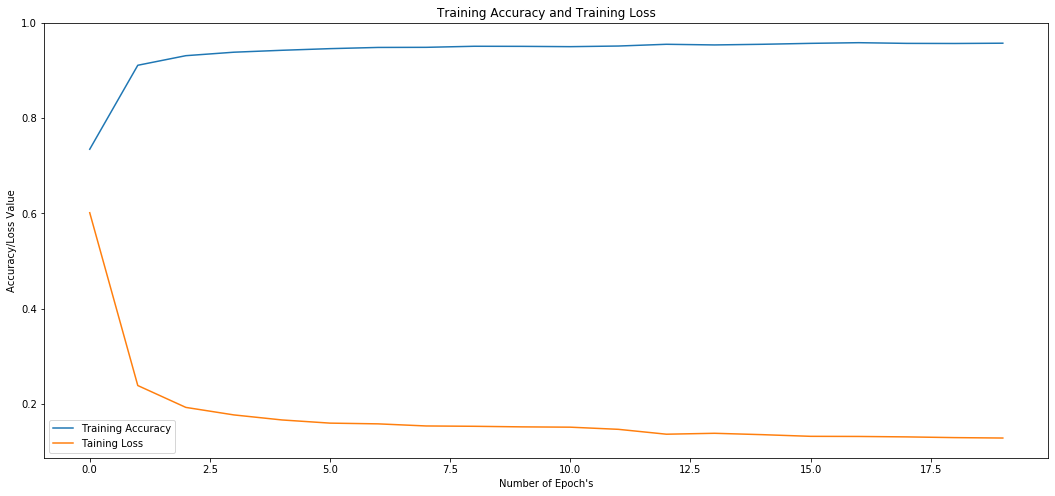

In [24]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

# ax2.plot(range(20), h.history['loss'], label = 'Training Loss')
# ax2.plot(range(20), h.history['val_loss'], label = 'Validation Loss')
# #ax2.set_xticks(np.arange(0, 31, 5))
# ax2.set_xlabel("Number of Epoch's")
# ax2.set_ylabel('Loss Value')
# ax2.set_title('Training Loss vs Validation Loss')
# ax2.legend(loc = "best")

In [25]:
predictions = model.evaluate(x_test, y_test)


5512/5512 [==============================] - 4s 803us/step


In [26]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.13088225977730508
ACCURACY : 0.9570028781890869


In [27]:
from keras.preprocessing.image import ImageDataGenerator


In [28]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [29]:
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [30]:
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [31]:
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 54s 156ms/step - loss: 0.7994 - accuracy: 0.6174
Epoch 2/50
344/344 [==============================] - 54s 157ms/step - loss: 0.5333 - accuracy: 0.7412
Epoch 3/50
344/344 [==============================] - 60s 175ms/step - loss: 0.3824 - accuracy: 0.8408
Epoch 4/50
344/344 [==============================] - 55s 161ms/step - loss: 0.3292 - accuracy: 0.8700
Epoch 5/50
344/344 [==============================] - 57s 166ms/step - loss: 0.3046 - accuracy: 0.8836
Epoch 6/50
344/344 [==============================] - 57s 164ms/step - loss: 0.2867 - accuracy: 0.8928
Epoch 7/50
344/344 [==============================] - 56s 164ms/step - loss: 0.2818 - accuracy: 0.8942
Epoch 8/50
344/344 [==============================] - 57s 166ms/step - loss: 0.2709 - accuracy: 0.8995
Epoch 9/50
344/344 [==============================] - 56s 163ms/step - loss: 0.2760 - accuracy: 0.8990
Epoch 10/50
344/344 [==============================] - 58s 167ms/step - l

In [32]:
predict = model_aug.evaluate_generator(val_generator, steps = 5)


In [33]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.4463675618171692
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.909375011920929


In [34]:
import numpy as np
from keras.preprocessing import image
from PIL import Image, ImageFont, ImageDraw

In [56]:
test_image = plt.imread('/Users/jeffreyscruggs/Desktop/A.I. Projects/cell_images/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_162.png')
img_resize = cv2.resize(test_image, (50, 50))
test_image = image.img_to_array(img_resize)
test_image = np.expand_dims(test_image, axis = 0)
result = model_aug.predict(test_image)
print(result)

[[1. 0.]]


In [57]:
model_aug.predict(test_image)

array([[1., 0.]], dtype=float32)